<a href="https://colab.research.google.com/github/carvalheirafc/jupyter_backups/blob/main/pi_question_2_histogram_equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img_files = [
    'Google JAX low contrast.jpg',
    'woman low contrast.jpg'
]
image_data = []

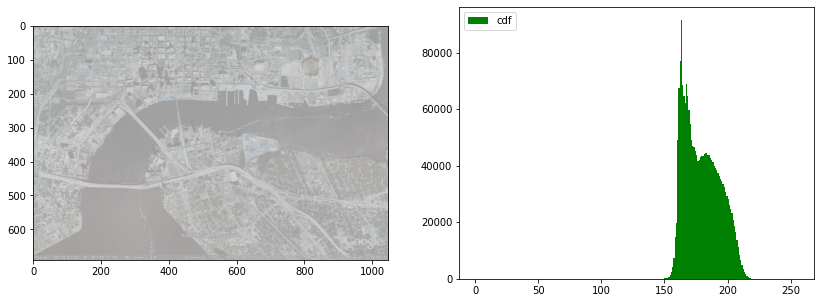

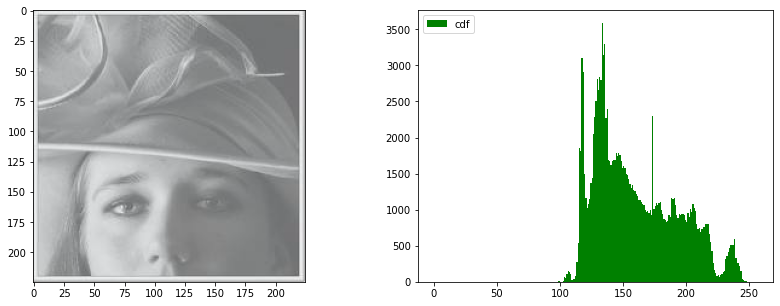

In [3]:
'''
Image IO and Plot

'''            

for img in img_files:
  image = cv2.imread(img)
  
  image_data.append(image)
  
  fig, axs = plt.subplots(1, 2, figsize=(14, 5))
  # Original image Plot
  axs[0].imshow(image, cmap='gray')

  # Histogram Plot 
  axs[1].hist(image.flatten(), 256, [0, 256], color='g')
  axs[1].legend(('cdf','histogram'), loc = 'upper left')

  plt.show()

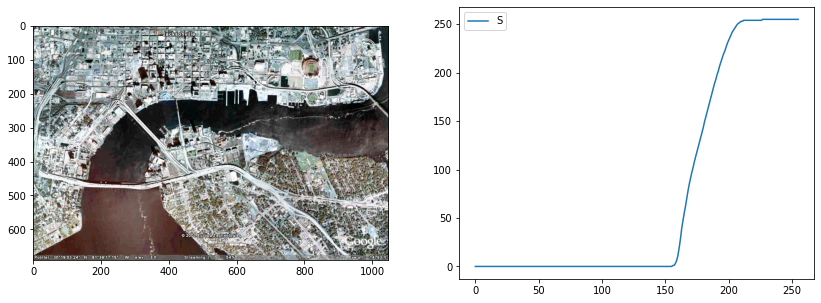

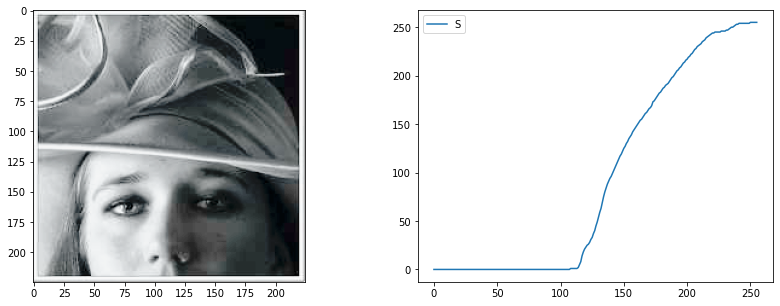

In [4]:
for image in image_data:
  histogram ,bins = np.histogram(image.flatten(), 256, [0,256])
  histogram_cumulative_sum = histogram.cumsum()
  
  '''
  Masking the Cumulative Sum Histogram.
  Mask where is 0
  Normalization bettween the 0~255 values
  Change of masked values to 0 and convert to Unsigned 8bit int 
  '''
  masked_hist = np.ma.masked_equal(histogram_cumulative_sum, 0)
  masked_hist = (masked_hist- masked_hist.min())*255/(masked_hist.max()-masked_hist.min())
  converted_values = np.ma.filled(masked_hist,0).astype('uint8')

  fig, axs = plt.subplots(1, 2, figsize=(14, 5))
  axs[0].imshow(converted_values[image])

  # Histogram Plot 
  #axs[1].hist(image.flatten(), 256, [0, 256], color='g')
  axs[1].plot(converted_values)
  axs[1].legend(('Soma Acumulativa'), loc = 'upper left')

  plt.show()